In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/pokemon-data/pokemon_data.csv')
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [2]:
## this analysis will be based on only regular pokemon so we will exclude mega and legendary pokemon. we will then continue to make our data look more presentable by dropping the legendary column and then aggregate all the stat colums to give a 'Total' column.
df['Total']=df.iloc[:,4:10].sum(axis=1)
non_mega=df.loc[~df['Name'].str.contains('Mega')]
df=non_mega.loc[df['Legendary']==False]
df.drop(columns='Legendary')

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,525
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,405
...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,85,100,122,58,75,54,6,494
788,712,Bergmite,Ice,NaN,55,69,85,32,35,28,6,304
789,713,Avalugg,Ice,NaN,95,117,184,44,46,28,6,514
790,714,Noibat,Flying,Dragon,40,30,35,45,40,55,6,245


In [3]:
## lets move the total column to the left near the stats columns
df = df[['#','Name','Type 1','Type 2','HP','Attack','Sp. Atk','Defense','Sp. Def','Speed','Total','Generation']]
df

,#,Name,Type 1,Type 2,HP,Attack,Sp. Atk,Defense,Sp. Def,Speed,Total,Generation
0,1,Bulbasaur,Grass,Poison,45,49,65,49,65,45,318,1
1,2,Ivysaur,Grass,Poison,60,62,80,63,80,60,405,1
2,3,Venusaur,Grass,Poison,80,82,100,83,100,80,525,1
4,4,Charmander,Fire,NaN,39,52,60,43,50,65,309,1
5,5,Charmeleon,Fire,NaN,58,64,80,58,65,80,405,1
...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,85,100,58,122,75,54,494,6
788,712,Bergmite,Ice,NaN,55,69,32,85,35,28,304,6
789,713,Avalugg,Ice,NaN,95,117,44,184,46,28,514,6
790,714,Noibat,Flying,Dragon,40,30,45,35,40,55,245,6


In [4]:
## there are 2 different attack and defense type columns. lets use the mean to find the average for each respective stat
df['ATK AVG']=df.iloc[:,5:7].mean(axis=1)
df['DEF AVG']=df.iloc[:,7:9].mean(axis=1)
df

,#,Name,Type 1,Type 2,HP,Attack,Sp. Atk,Defense,Sp. Def,Speed,Total,Generation,ATK AVG,DEF AVG
0,1,Bulbasaur,Grass,Poison,45,49,65,49,65,45,318,1,57.0,57.0
1,2,Ivysaur,Grass,Poison,60,62,80,63,80,60,405,1,71.0,71.5
2,3,Venusaur,Grass,Poison,80,82,100,83,100,80,525,1,91.0,91.5
4,4,Charmander,Fire,NaN,39,52,60,43,50,65,309,1,56.0,46.5
5,5,Charmeleon,Fire,NaN,58,64,80,58,65,80,405,1,72.0,61.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,85,100,58,122,75,54,494,6,79.0,98.5
788,712,Bergmite,Ice,NaN,55,69,32,85,35,28,304,6,50.5,60.0
789,713,Avalugg,Ice,NaN,95,117,44,184,46,28,514,6,80.5,115.0
790,714,Noibat,Flying,Dragon,40,30,45,35,40,55,245,6,37.5,37.5


In [5]:
## lets reorder our columns to have our averaged attack and defense stats next to their respective groups
df = df[['#','Name','Type 1','Type 2','HP','Attack','Sp. Atk','ATK AVG','Defense','Sp. Def','DEF AVG','Speed','Total','Generation']]
df

,#,Name,Type 1,Type 2,HP,Attack,Sp. Atk,ATK AVG,Defense,Sp. Def,DEF AVG,Speed,Total,Generation
0,1,Bulbasaur,Grass,Poison,45,49,65,57.0,49,65,57.0,45,318,1
1,2,Ivysaur,Grass,Poison,60,62,80,71.0,63,80,71.5,60,405,1
2,3,Venusaur,Grass,Poison,80,82,100,91.0,83,100,91.5,80,525,1
4,4,Charmander,Fire,NaN,39,52,60,56.0,43,50,46.5,65,309,1
5,5,Charmeleon,Fire,NaN,58,64,80,72.0,58,65,61.5,80,405,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,85,100,58,79.0,122,75,98.5,54,494,6
788,712,Bergmite,Ice,NaN,55,69,32,50.5,85,35,60.0,28,304,6
789,713,Avalugg,Ice,NaN,95,117,44,80.5,184,46,115.0,28,514,6
790,714,Noibat,Flying,Dragon,40,30,45,37.5,35,40,37.5,55,245,6


In [6]:
## lets use the mean and groupby functions to find the stats for the primary type of each pokemon(its type 1) and lets order them in descending order to see which type is the strongest. as we can see Dragon types are the strongest and Bug types are the weakest
mean = df.groupby('Type 1').mean().sort_values('Total', ascending=False)
mean

,#,HP,Attack,Sp. Atk,ATK AVG,Defense,Sp. Def,DEF AVG,Speed,Total,Generation
Type 1,,,,,,,,,,,
Dragon,458.529412,69.117647,96.647059,65.176471,80.911765,71.058824,74.000000,72.529412,67.941176,443.941176,3.823529
Steel,467.315789,58.684211,84.368421,59.631579,72.000000,114.631579,72.368421,93.500000,47.578947,437.263158,4.105263
Fire,339.232558,66.209302,77.883721,80.883721,79.383721,61.953488,66.511628,64.232558,72.651163,426.093023,3.348837
Rock,379.894737,63.815789,86.789474,58.947368,72.868421,96.052632,69.894737,82.973684,50.552632,426.052632,3.394737
Electric,363.973684,56.131579,65.131579,82.921053,74.026316,64.000000,71.131579,67.565789,81.868421,421.184211,3.315789
Dark,469.384615,64.807692,84.384615,65.692308,75.038462,66.038462,65.461538,65.750000,72.576923,418.961538,4.115385
Ghost,505.214286,58.500000,68.250000,73.428571,70.839286,79.392857,73.178571,76.285714,59.785714,412.535714,4.357143
Ice,441.952381,70.380952,71.000000,73.619048,72.309524,68.285714,67.904762,68.095238,61.333333,412.523810,3.714286
Water,296.787879,69.494949,69.828283,69.000000,69.414141,68.949495,65.686869,67.318182,63.262626,406.222222,2.838384


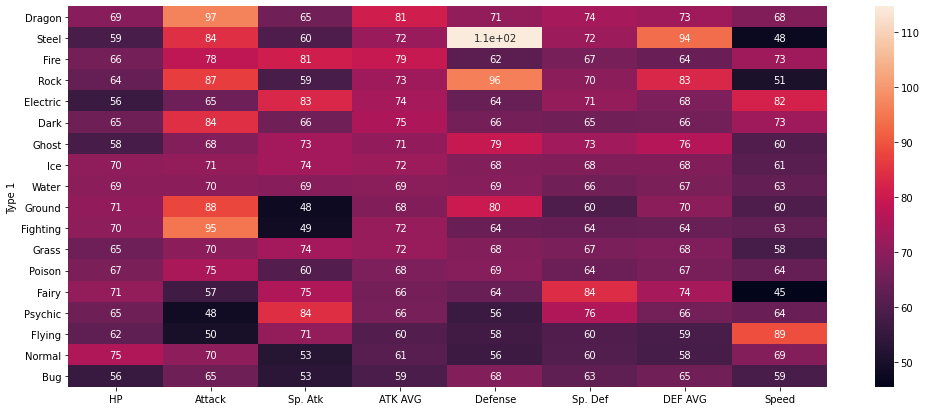

In [7]:
## lets see how we can use a heatmap to see where the specific strengths and weakness lie in each type of pokemon.
## a standout figure we can cleary see is the fearsome defense of Steel type pokemon who possess the only 3 digit stat amongst all other stats
## a dragon type pokemons weakest stat (65) isclose enough to a bug pokemons strongest stat (68)
## from the distribution of colors we can see majority of pokemons strengths lie in their attack and their weakness lies in their speed
stats=mean.drop(['#','Total', 'Generation'], axis=1)
plt.figure(figsize=(17,7))
sns.heatmap(data=stats, annot=True)

<function matplotlib.pyplot.show(*args, **kw)>

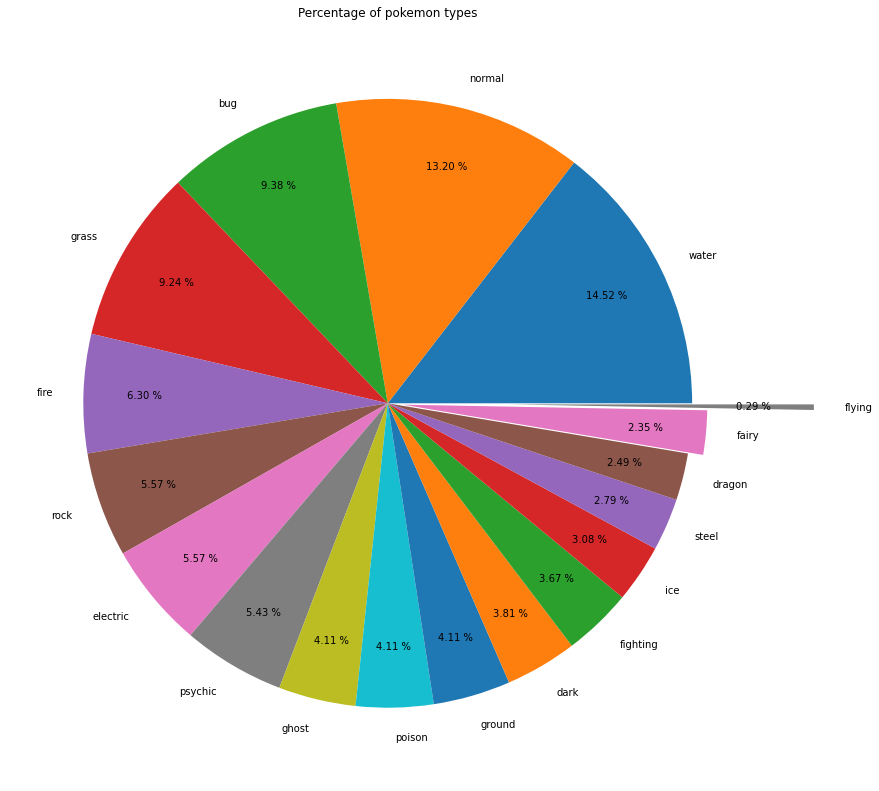

In [8]:
## lets create a pie chart by counting how many pokemon there are in each type (using type 1 as that is the primary type)
water=df.loc[df['Type 1'] == 'Water'].count()[0]
normal=df.loc[df['Type 1'] == 'Normal'].count()[0]
bug=df.loc[df['Type 1'] == 'Bug'].count()[0]
grass=df.loc[df['Type 1'] == 'Grass'].count()[0]
fire=df.loc[df['Type 1'] == 'Fire'].count()[0]
rock=df.loc[df['Type 1'] == 'Rock'].count()[0]
electric=df.loc[df['Type 1'] == 'Electric'].count()[0]
psychic=df.loc[df['Type 1'] == 'Psychic'].count()[0]
ghost=df.loc[df['Type 1'] == 'Ghost'].count()[0]
poison=df.loc[df['Type 1'] == 'Poison'].count()[0]
ground=df.loc[df['Type 1'] == 'Ground'].count()[0]
dark=df.loc[df['Type 1'] == 'Dark'].count()[0]
fighting=df.loc[df['Type 1'] == 'Fighting'].count()[0]
ice=df.loc[df['Type 1'] == 'Ice'].count()[0]
steel=df.loc[df['Type 1'] == 'Steel'].count()[0]
dragon=df.loc[df['Type 1'] == 'Dragon'].count()[0]
fairy=df.loc[df['Type 1'] == 'Fairy'].count()[0]
flying=df.loc[df['Type 1'] == 'Flying'].count()[0]

## lets make this easier to visualise by using the explode function allowing us to read values that are very small on the pie chart by bringing them out
explode=(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.05,0.4)
labels=['water','normal','bug','grass','fire','rock','electric','psychic','ghost','poison','ground','dark','fighting','ice','steel','dragon','fairy','flying']
plt.figure(figsize=(14,14))
plt.pie([water,normal,bug,grass,fire,rock,electric,psychic,ghost,poison,ground,dark,fighting,ice,steel,dragon,fairy,flying],labels=labels,pctdistance=0.8,explode=explode, autopct='%.2f %%')
plt.title('Percentage of pokemon types')
plt.show

## as we can see water pokemon are most prominent and this makes sense as we can imagine that majority of the world consists of water
## fairy and dragon are uncommon as we can imagine that these types wouldbe rare to find as it can be related to fairy tale style lore where these types are creatues are rare beings
## it is surprising to see flying pokemon as the least common, however in the pokemon universe majority of pokemon that are birds have a type 1 of flying which can explain why normal types are the second most common

In [9]:
## lets categorise pokemon by their generations
gen1=df.loc[df['Generation']==1].reset_index(drop=True)
gen2=df.loc[df['Generation']==2].reset_index(drop=True)
gen3=df.loc[df['Generation']==3].reset_index(drop=True)
gen4=df.loc[df['Generation']==4].reset_index(drop=True)
gen5=df.loc[df['Generation']==5].reset_index(drop=True)
gen6=df.loc[df['Generation']==6].reset_index(drop=True)

<function matplotlib.pyplot.show(*args, **kw)>

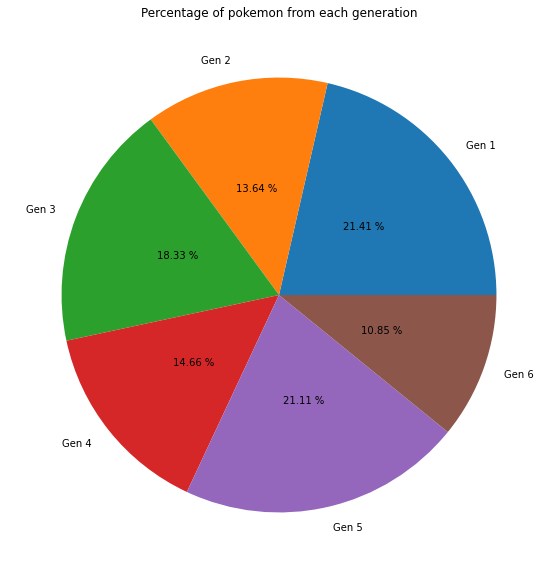

In [10]:
gen1c=gen1.count()[0]
gen2c=gen2.count()[0]
gen3c=gen3.count()[0]
gen4c=gen4.count()[0]
gen5c=gen5.count()[0]
gen6c=gen6.count()[0]

plt.figure(figsize=(10,10))
labels=['Gen 1','Gen 2','Gen 3','Gen 4','Gen 5','Gen 6']
plt.pie([gen1c,gen2c,gen3c,gen4c,gen5c,gen6c],labels=labels,pctdistance=0.5,autopct='%.2f %%')
plt.title('Percentage of pokemon from each generation')
plt.show

## gen 1 contains the most pokemon compared to all other generations
## if we focus on the values they seem to follow a pattern of increasing and decreasing for each coming generation
## it has seemed the creators at pokemon headquarters created alot more in gen 5 but then became quite complacent in gen 6

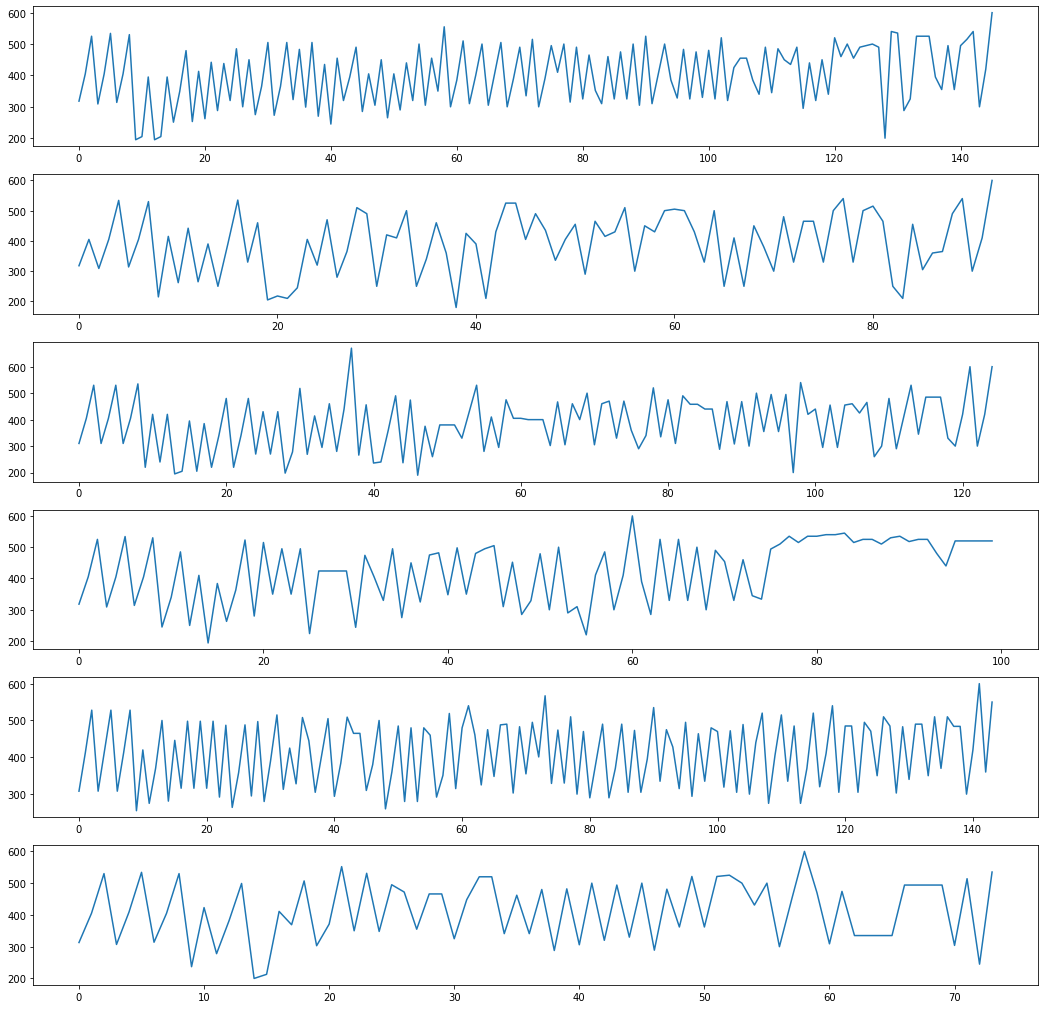

In [11]:
## lets plot a line plot to see if there is a trend between a pokemons index value and their total stats
## as we can see there are sharp spikes at the beginning of each plot which tells us the starter pokemon we begin with in the games grow to become much more powerful pokemon later on
## if we now look at the end of each plot we can see the spikes are usually higher than the rest of our plots, this is also supported by our plot of gen 4 indicating that pokemon with higher index values tend to be stronger
## but what about all the values in the middle? i think we can better present our findings using scatter plots to display relationships between 2 variables

fig, axs = plt.subplots(6, figsize = (18,18))
axs[0].plot(gen1.index,gen1.Total)
axs[1].plot(gen2.index,gen2.Total)
axs[2].plot(gen3.index,gen3.Total)
axs[3].plot(gen4.index,gen4.Total)
axs[4].plot(gen5.index,gen5.Total)
axs[5].plot(gen6.index,gen6.Total)

Text(0.5, 1.0, 'Gen 6')

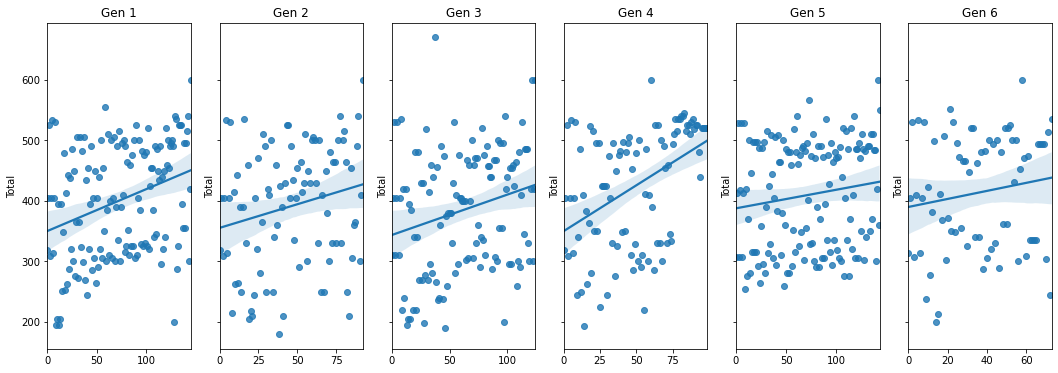

In [12]:
## as we can now see amongst all generations that there is a strong corellation between a pokemons index value and its strength
## as mentioned before this is particularly evident with gen which has the strongest positive corellation
## gen 6 has the weakest positive corellation as we can see many of its points are scattered far from the regression line

f, axes = plt.subplots(figsize = (18,6),ncols=6,sharey=True)
sns.regplot(x=gen1.index, y=gen1['Total'], ax=axes[0]).set_title('Gen 1')
sns.regplot(x=gen2.index, y=gen2['Total'], ax=axes[1]).set_title('Gen 2')
sns.regplot(x=gen3.index, y=gen3['Total'], ax=axes[2]).set_title('Gen 3')
sns.regplot(x=gen4.index, y=gen4['Total'], ax=axes[3]).set_title('Gen 4')
sns.regplot(x=gen5.index, y=gen5['Total'], ax=axes[4]).set_title('Gen 5')
sns.regplot(x=gen6.index, y=gen6['Total'], ax=axes[5]).set_title('Gen 6')

In [13]:
## lets replace NaN values in our Type 2 column with the string 'None'
types=df
types['Type 2'].fillna('None', inplace = True)
types

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,#,Name,Type 1,Type 2,HP,Attack,Sp. Atk,ATK AVG,Defense,Sp. Def,DEF AVG,Speed,Total,Generation
0,1,Bulbasaur,Grass,Poison,45,49,65,57.0,49,65,57.0,45,318,1
1,2,Ivysaur,Grass,Poison,60,62,80,71.0,63,80,71.5,60,405,1
2,3,Venusaur,Grass,Poison,80,82,100,91.0,83,100,91.5,80,525,1
4,4,Charmander,Fire,None,39,52,60,56.0,43,50,46.5,65,309,1
5,5,Charmeleon,Fire,None,58,64,80,72.0,58,65,61.5,80,405,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,85,100,58,79.0,122,75,98.5,54,494,6
788,712,Bergmite,Ice,None,55,69,32,50.5,85,35,60.0,28,304,6
789,713,Avalugg,Ice,None,95,117,44,80.5,184,46,115.0,28,514,6
790,714,Noibat,Flying,Dragon,40,30,45,37.5,35,40,37.5,55,245,6


In [14]:
## lets create a new column called '2 Types?' to mention whether a pokemon has 2 types or not. this is done using the map function and a dictionary
types['2 types?']=types['Type 2'].map({'Fairy':'Yes','Electric':'Yes','Ice':'Yes','Dark':'Yes','Ground':'Yes','Rock':'Yes','Dragon':'Yes','Poison':'Yes','Fire':'Yes','Water':'Yes','Steel':'Yes','Ghost':'Yes','Normal':'Yes','Bug':'Yes','Psychic':'Yes','Flying':'Yes','Fighting':'Yes','Grass':'Yes','None':'No'})
types

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,#,Name,Type 1,Type 2,HP,Attack,Sp. Atk,ATK AVG,Defense,Sp. Def,DEF AVG,Speed,Total,Generation,2 types?
0,1,Bulbasaur,Grass,Poison,45,49,65,57.0,49,65,57.0,45,318,1,Yes
1,2,Ivysaur,Grass,Poison,60,62,80,71.0,63,80,71.5,60,405,1,Yes
2,3,Venusaur,Grass,Poison,80,82,100,91.0,83,100,91.5,80,525,1,Yes
4,4,Charmander,Fire,None,39,52,60,56.0,43,50,46.5,65,309,1,No
5,5,Charmeleon,Fire,None,58,64,80,72.0,58,65,61.5,80,405,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,85,100,58,79.0,122,75,98.5,54,494,6,Yes
788,712,Bergmite,Ice,None,55,69,32,50.5,85,35,60.0,28,304,6,No
789,713,Avalugg,Ice,None,95,117,44,80.5,184,46,115.0,28,514,6,No
790,714,Noibat,Flying,Dragon,40,30,45,37.5,35,40,37.5,55,245,6,Yes


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


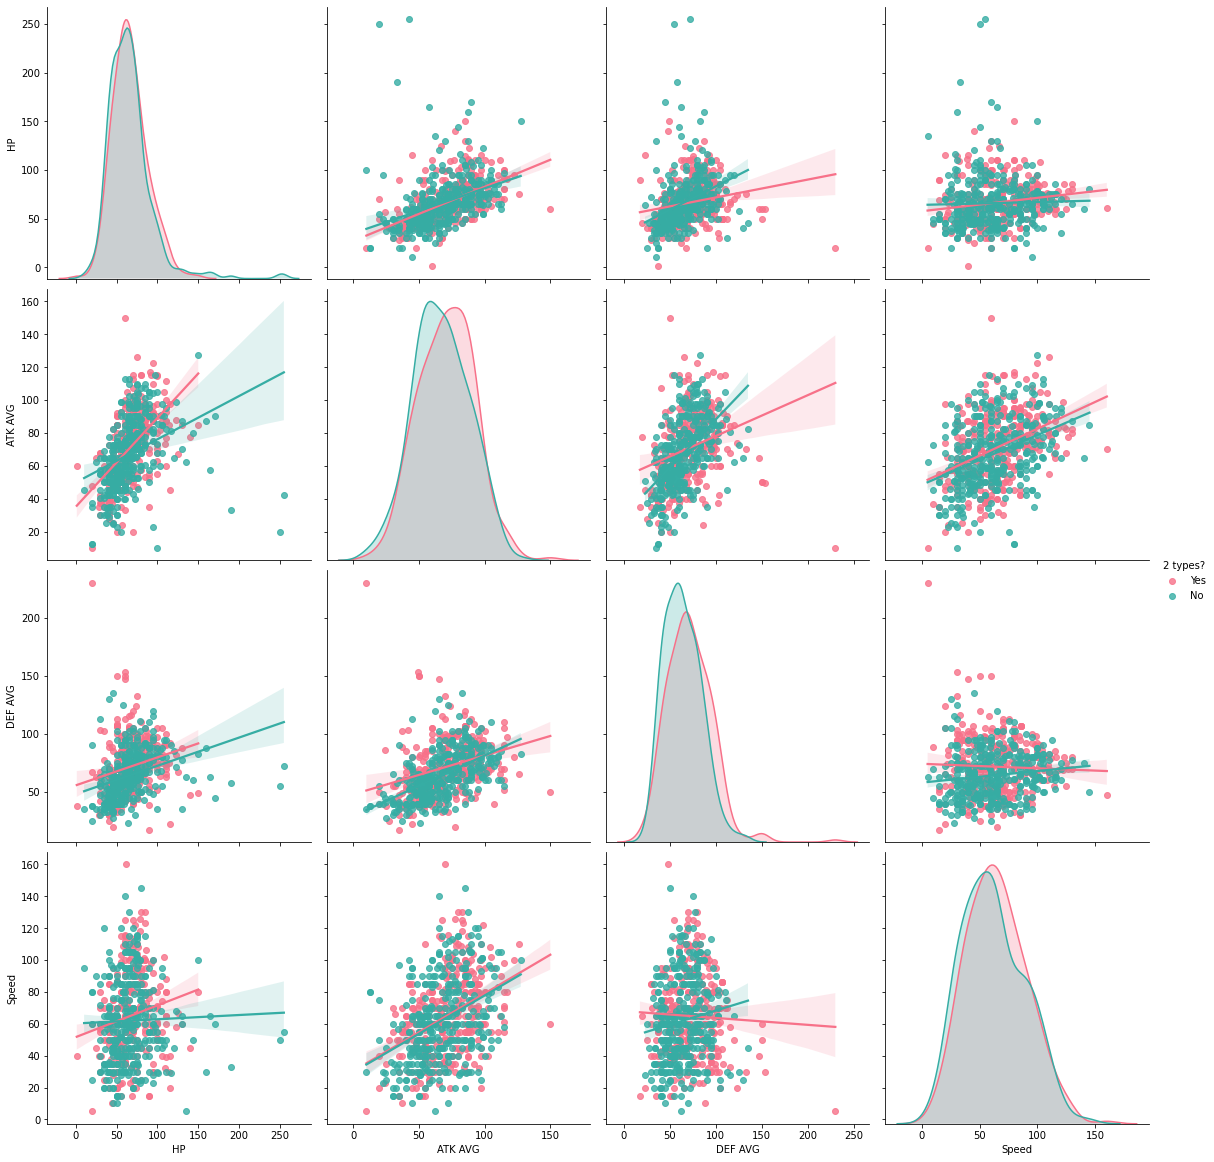

In [15]:
## lets use pairplot to present our findings comparing each variable and seeing whether a pokemon having 2 types outclasses those who possess only 1
## in majority of cases it can be seen a pokemon with 2 types has a stronger positive corellation compared to 1 type
## upon further inspection it can be seen that pokemon with only 1 type have a positive corellation with all variables
## pokemon with 2 types have have a negative corellation with DEF AVG vs Speed. in this category the 2 types and 1 type break even at approximately 70-80 stat points in DEF AVG, after this 1 type pokemon tend to be superior

sns.pairplot(df,size=4,kind='reg', vars=['HP','ATK AVG','DEF AVG','Speed'],palette='husl',hue='2 types?')

Text(0.5, 1.0, 'Total Distribution')

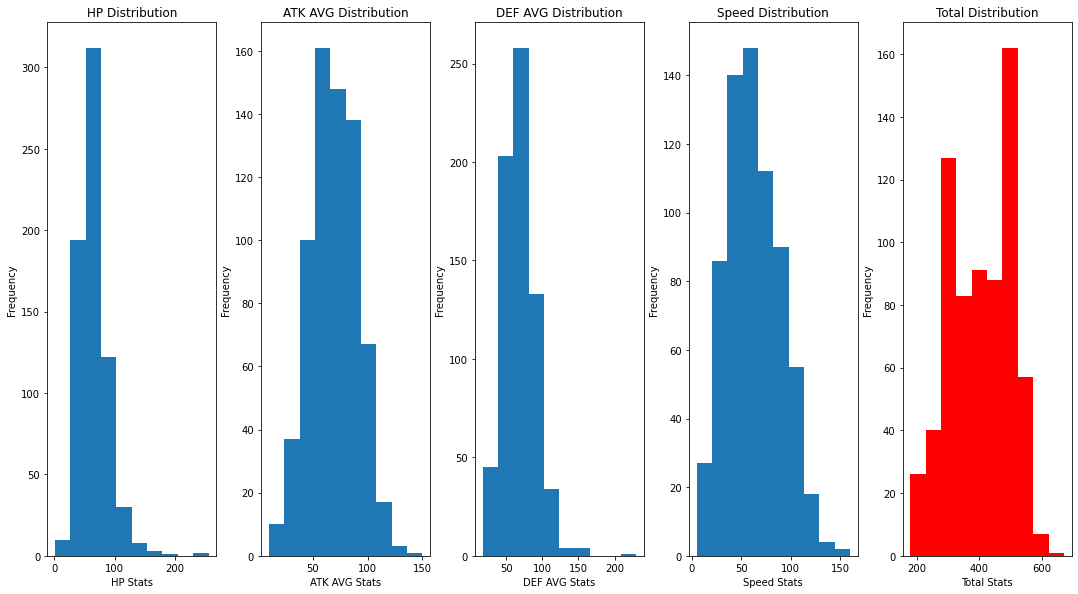

In [16]:
fig, axes= plt.subplots(ncols=5, figsize = (15,8))
fig.tight_layout()
df['HP'].plot.hist(ax=axes[0])
df['ATK AVG'].plot.hist(ax=axes[1])
df['DEF AVG'].plot.hist(ax=axes[2])
df['Speed'].plot.hist(ax=axes[3])
df['Total'].plot.hist(ax=axes[4], color='red')

axes[0].set_xlabel('HP Stats')
axes[1].set_xlabel('ATK AVG Stats')
axes[2].set_xlabel('DEF AVG Stats')
axes[3].set_xlabel('Speed Stats')
axes[4].set_xlabel('Total Stats')

axes[0].set_title('HP Distribution')
axes[1].set_title('ATK AVG Distribution')
axes[2].set_title('DEF AVG Distribution')
axes[3].set_title('Speed Distribution')
axes[4].set_title('Total Distribution')

## lets use histograms to plot the distribution of each stat **NOTE** the total distribution consists of a pokemons original stats and does not include ATK/DEF AVG
## Majority of pokemon have a HP of approximately 50 points
## Majority of pokemon have an ATK AVG of approximately 60 points
## Majority of pokemon have a DEF AVG of approximately 60 points
## Majority of pokemon have a Speed of approximately 45 points
## Majority of pokemon have a Total of approximately 500 points

Text(0.5, 1.0, 'Spread of Pokemon stats')

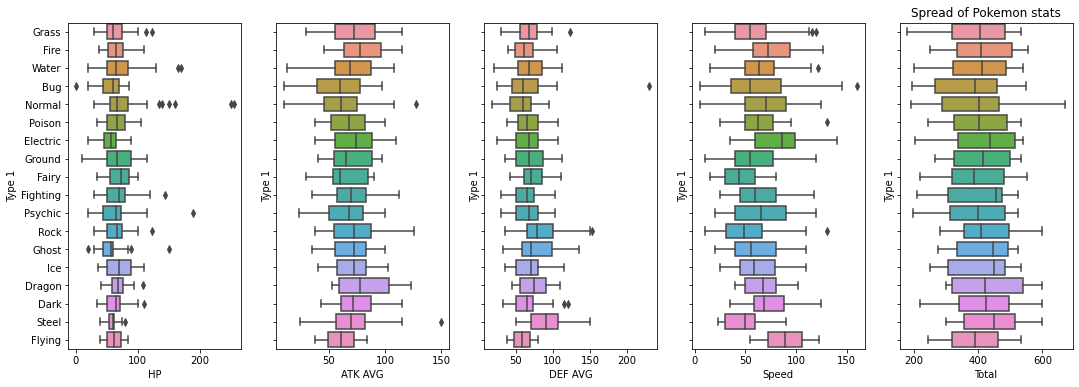

In [17]:
## using boxplots we can compare the spread of data between each pokemon type and its respective stats
## Normal types have the most outliters in its HP
## Flying types types tend to be weaker across the board, however have the most consistency due to the smallest range
## from the total spread we can see there must be a Normal type of pokemon whos stats are vastly superior compared to all other pokemon in this this data set, which explains the outliers in the other plots
## looking at the total plot, Dragon types have the largest and highest IQR
## it can also be seen that the weakest pokemon of Dragon type is stronger in majority of other stats compared to other types of pokemon
## HP similar medians for each type with Speed being the opposite

f, axes = plt.subplots(figsize = (18,6),ncols=5,sharey=True)
sns.boxplot(y=df['Type 1'], x=df['HP'], ax=axes[0])
sns.boxplot(y=df['Type 1'], x=df['ATK AVG'], ax=axes[1])
sns.boxplot(y=df['Type 1'], x=df['DEF AVG'], ax=axes[2])
sns.boxplot(y=df['Type 1'], x=df['Speed'], ax=axes[3])
sns.boxplot(y=df['Type 1'], x=df['Total'], ax=axes[4])
plt.title('Spread of Pokemon stats')

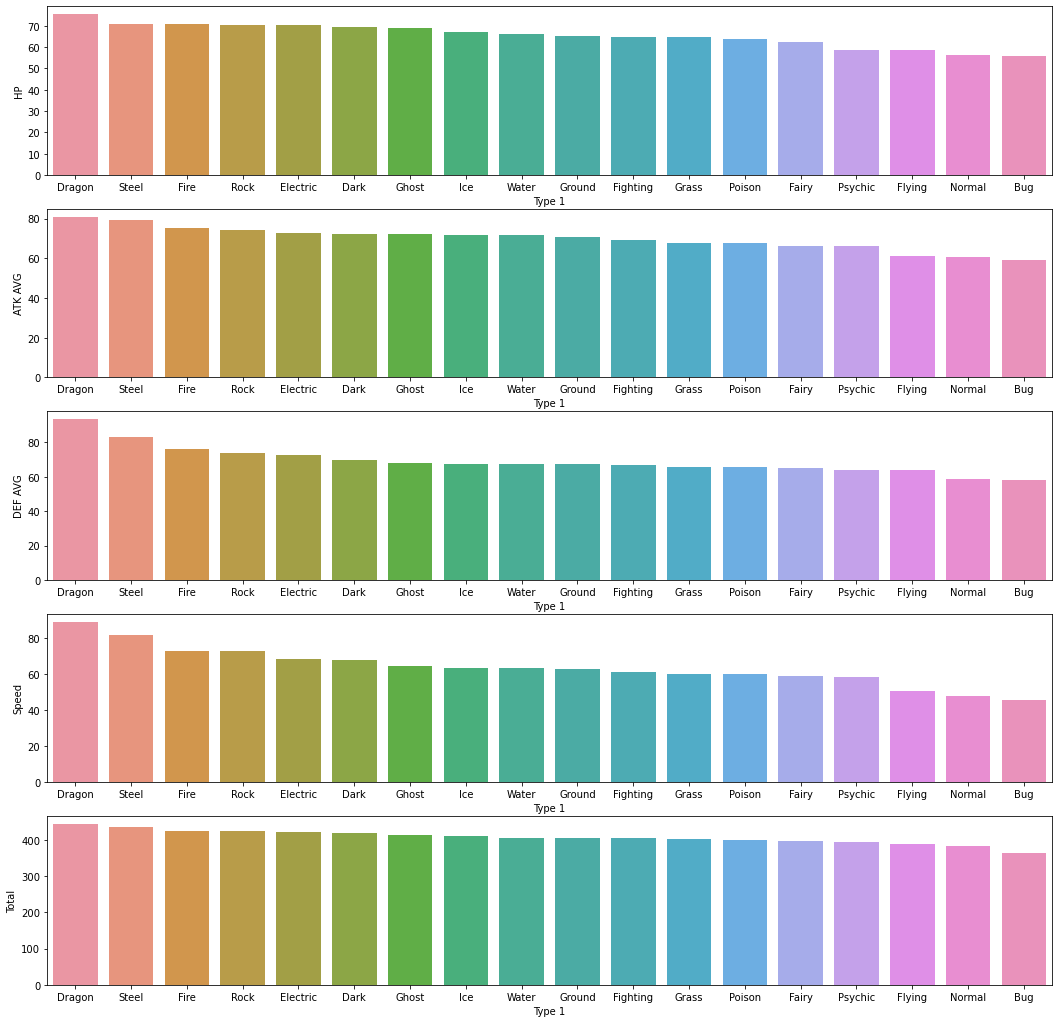

In [18]:
## lets use a barchart to find the average of each type by each stat and rank them in descending order
## as we can see the type rank for each stat is in the same order throughout

f, axes = plt.subplots(figsize = (18,18),ncols=1,nrows=5)
fig.tight_layout()

sns.barplot(x=mean.index,y=mean['HP'].sort_values(ascending=False),ax=axes[0])
sns.barplot(x=mean.index,y=mean['ATK AVG'].sort_values(ascending=False),ax=axes[1])
sns.barplot(x=mean.index,y=mean['DEF AVG'].sort_values(ascending=False),ax=axes[2])
sns.barplot(x=mean.index,y=mean['Speed'].sort_values(ascending=False),ax=axes[3])
sns.barplot(x=mean.index,y=mean['Total'].sort_values(ascending=False),ax=axes[4])